# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
#%matplotlib inline
#IPython import get_ipython

#from IPython.core.pylabtools import figsize


#figsize(12, 8)

#sns.set()

## Parte 1

### _Setup_ da parte 1

In [2]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

### Distribuição Normal

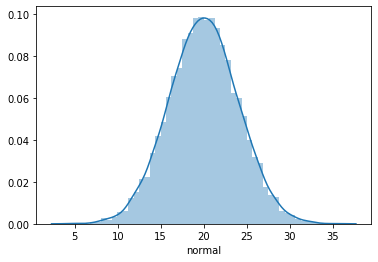

In [3]:
# Sua análise da parte 1 começa aqui.
sns.distplot(dataframe['normal'])

### Distribuição Binomial

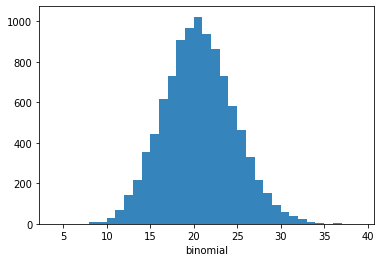

In [4]:
sns.distplot(dataframe['binomial'], bins=range(4, 40), kde=False, hist_kws={"alpha": 0.9})

#### Resolução Questão 01

In [5]:
df_normal_quartis = dataframe['normal'].describe().loc[['25%','50%','75%']]
df_normal_quartis

25%    17.309638
50%    19.989620
75%    22.684324
Name: normal, dtype: float64

In [6]:
df_binomial_quartis = dataframe['binomial'].describe().loc[['25%','50%','75%']]
df_binomial_quartis

25%    17.0
50%    20.0
75%    23.0
Name: binomial, dtype: float64

In [7]:
sub_quartis = df_normal_quartis - df_binomial_quartis
sub_quartis = sub_quartis.round(3)
sub_quartis

25%    0.310
50%   -0.010
75%   -0.316
dtype: float64

In [8]:
quartis = tuple(list(sub_quartis))
quartis

(0.31, -0.01, -0.316)

#### Resolução Questão 02

In [47]:
norm = dataframe['normal']
ecdf = ECDF(norm)
prob_norm = ecdf(norm.mean() + norm.std()) - ecdf(norm.mean() - norm.std())
prob_norm = prob_norm.round(3)
prob_norm

0.6838


0.684

#### Resolução da Questão 03

In [40]:
norm = dataframe['normal']
binom = dataframe['binomial']

##### Criando um dataframe com os resultados da média e variância da normal

In [55]:
dn = {'media':[norm.mean()], 'variancia':[norm.var()]}
df_norm = pd.DataFrame(data = dn)
df_norm

,media,variancia
0,19.991456,16.110988


##### Criando um dataframe com os resultados da média e variância da binomial

In [56]:
db = {'media':[binom.mean()], 'variancia':[binom.var()]}
df_binom = pd.DataFrame(data = db)
df_binom

,media,variancia
0,20.097,16.331224


In [62]:
result = df_binom.loc[0] - df_norm.loc[0]
result = result.round(3)
result = tuple(list(result))
result

(0.106, 0.22)

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [5]:
def q1():
    # Retorne aqui o resultado da questão 1.
    df_normal_quartis = dataframe['normal'].describe().loc[['25%','50%','75%']]
    df_binomial_quartis = dataframe['binomial'].describe().loc[['25%','50%','75%']]
    sub_quartis = df_normal_quartis - df_binomial_quartis
    sub_quartis = sub_quartis.round(3)
    quartis = tuple(list(sub_quartis))
    
    return quartis

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [14]:
def q2():
    # Retorne aqui o resultado da questão 2.
    norm = dataframe['normal']
    ecdf = ECDF(norm)
    prob_norm = ecdf(norm.mean() + norm.std()) - ecdf(norm.mean() - norm.std())
    prob_norm = prob_norm.round(3)
    
    return float(prob_norm)

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [7]:
def q3():
    # Retorne aqui o resultado da questão 3.
    norm = dataframe['normal']
    binom = dataframe['binomial']
    dn = {'media':[norm.mean()], 'variancia':[norm.var()]}
    df_norm = pd.DataFrame(data = dn)
    db = {'media':[binom.mean()], 'variancia':[binom.var()]}
    df_binom = pd.DataFrame(data = db)
    result = df_binom.loc[0] - df_norm.loc[0]
    result = result.round(3)
    result = tuple(list(result))   
    
    return result

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [32]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [33]:
# Sua análise da parte 2 começa aqui.
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


In [34]:
stars.shape

(17897, 9)

#### Resolução questão 04

In [35]:
not_pulsar = stars.loc[stars['target'] == False]
mean_not_pulsar = not_pulsar['mean_profile']


In [36]:
x = mean_not_pulsar
false_pulsar_mean_profile_standardized = (x-x.mean()) / x.std()


##### Quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função norm.ppf() disponível em scipy.stats

In [39]:
q_80 = sct.norm.ppf(0.8, loc=0, scale=1)
q_90 = sct.norm.ppf(0.9, loc=0, scale=1)
q_95 = sct.norm.ppf(0.95, loc=0, scale=1)
#calculando média e desvio padrão para a tabela normalizada da questão
#media_pulsar = false_pulsar_mean_profile_standardized.mean()
#dpadrao_pulsar = false_pulsar_mean_profile_standardized.std()
#cálculo das probabilidades usando os quantis ideais com as medias e desvio padrão da questão
#prob_80 = sct.norm.cdf(q_80, loc=media_pulsar, scale=dpadrao_pulsar).round(3)
#prob_90 = sct.norm.cdf(q_90, loc=media_pulsar, scale=dpadrao_pulsar).round(3)
#prob_95 = sct.norm.cdf(q_95, loc=media_pulsar, scale=dpadrao_pulsar).round(3)
#prob_tuple = (prob_80, prob_90, prob_95)
#prob_tuple

##### Probabilidade associadas a esses quantis utilizando a CDF empírica da variável false_pulsar_mean_profile_standardized

In [42]:
ecdf = ECDF(false_pulsar_mean_profile_standardized)
prob_quantis = (ecdf(q_80).round(3), ecdf(q_90).round(3), ecdf(q_95).round(3))
prob_quantis

(0.806, 0.911, 0.959)

#### Resolução questão 05

#### Qual a diferença entre os quantis Q1, Q2 e Q3 de false_pulsar_mean_profile_standardized e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1?

In [82]:
false_pulsar_mean_profile_standardized

0       -0.804181
1       -0.775123
2        1.155263
3       -1.592787
4       -1.315613
5        0.167270
6        0.790913
7       -0.532819
8       -0.532372
9        1.460155
10       0.955429
11       1.052887
12       0.079200
13       1.237074
14      -0.125551
15      -0.396020
16      -0.898957
17       1.117710
19      -0.896722
20      -0.636089
21      -1.184179
22       0.046118
23      -0.567242
24      -0.219880
25       0.817736
26       0.164588
27       0.380516
28      -0.797923
29      -0.369196
30      -0.952604
           ...   
17866    0.864677
17867   -1.127403
17868    1.191028
17869   -0.331644
17870    0.140000
17871    1.335427
17872   -1.551211
17873    0.571856
17874    0.948723
17876    0.099318
17877   -1.511423
17878   -0.509125
17879   -0.633406
17880    0.797619
17881    0.826230
17882   -1.839115
17883   -0.554277
17884    0.987617
17885    0.601361
17886    0.275458
17887   -1.020556
17888    0.575879
17889    1.551354
17890    0.110047
17891   -1

In [170]:
pulsar_quartis = false_pulsar_mean_profile_standardized.describe().loc[['25%','50%','75%']]
pulsar_quartis

25%   -0.647153
50%    0.039859
75%    0.670655
Name: mean_profile, dtype: float64

In [171]:
q_25 = sct.norm.ppf(0.25, loc=0, scale=1)
q_50 = sct.norm.ppf(0.50, loc=0, scale=1)
q_75 = sct.norm.ppf(0.75, loc=0, scale=1)
normal_quartis_list = [q_25, q_50, q_75]
labels = ["25%", "50%", "75%"]
d = {'mean_profile': [q_25, q_50, q_75]}

normal_quartis = pd.DataFrame(data=d,index=labels)
normal_quartis = normal_quartis["mean_profile"]
normal_quartis

25%   -0.67449
50%    0.00000
75%    0.67449
Name: mean_profile, dtype: float64

In [173]:
sub_quartis = pulsar_quartis - normal_quartis
sub_quartis = sub_quartis.round(3)
result = tuple(list(sub_quartis))
result

(0.027, 0.04, -0.004)

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [10]:
def q4():
    # Retorne aqui o resultado da questão 4.
    #Configurando padronização
    not_pulsar = stars.loc[stars['target'] == False]
    mean_not_pulsar = not_pulsar['mean_profile']
    x = mean_not_pulsar
    false_pulsar_mean_profile_standardized = (x-x.mean()) / x.std()
    #quantis para média = 0 e desvio padrão = 1
    q_80 = sct.norm.ppf(0.8, loc=0, scale=1)
    q_90 = sct.norm.ppf(0.9, loc=0, scale=1)
    q_95 = sct.norm.ppf(0.95, loc=0, scale=1)
    #Probabilidades associadas aos quantis
    ecdf = ECDF(false_pulsar_mean_profile_standardized)
    prob_quantis = (ecdf(q_80).round(3), ecdf(q_90).round(3), ecdf(q_95).round(3))
    prob_quantis
    
    return prob_quantis

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [11]:
def q5():
    # Retorne aqui o resultado da questão 5.
    #Configurando padronização
    not_pulsar = stars.loc[stars['target'] == False]
    mean_not_pulsar = not_pulsar['mean_profile']
    x = mean_not_pulsar
    false_pulsar_mean_profile_standardized = (x-x.mean()) / x.std()
    #Calculando os Quartis do false_pulsar_mean_profile_standardized
    pulsar_quartis = false_pulsar_mean_profile_standardized.describe().loc[['25%','50%','75%']]
    #Calculando os Quartis de uma distribuição normal
    q_25 = sct.norm.ppf(0.25, loc=0, scale=1)
    q_50 = sct.norm.ppf(0.50, loc=0, scale=1)
    q_75 = sct.norm.ppf(0.75, loc=0, scale=1)
    #Criando um dataframe para os Quartis da distribuição normal
    normal_quartis_list = [q_25, q_50, q_75]
    labels = ["25%", "50%", "75%"]
    d = {'mean_profile': [q_25, q_50, q_75]}
    normal_quartis = pd.DataFrame(data=d,index=labels)
    normal_quartis = normal_quartis["mean_profile"]
    #Realizando a subtração entre os dataframes
    sub_quartis = pulsar_quartis - normal_quartis
    sub_quartis = sub_quartis.round(3)
    result = tuple(list(sub_quartis))
    
    return result

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.